## Introduction to Machine Learning with the California Housing Dataset


### Load the Dataset


In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [28]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### Exploring the Dataset: What and Why

Exploring a dataset is a crucial first step in any data analysis or machine learning workflow. This process, often called **Exploratory Data Analysis (EDA)**, helps you understand the structure, quality, and relationships within your data.

#### What Are We Looking For?

1. **Missing Values (`NA`s):**

   - Missing data can affect analyses and model performance.
   - You need to decide how to handle them (e.g., removal, imputation).

2. **Outliers:**

   - Extreme values that deviate significantly from the rest of the data.
   - They can distort statistical models and predictions, so it’s important to determine whether they represent errors or valid but rare phenomena.

3. **Data Types:**

   - Ensure variables are categorized correctly (e.g., numeric, categorical, datetime).
   - Incorrect types may lead to errors or ineffective analyses.

4. **Distributions:**

   - Check how values are distributed (e.g., normal, skewed).
   - Helps identify patterns and determine the need for transformations.

5. **Correlations:**

   - Look for relationships between variables to understand their interactions.
   - Identify multicollinearity, which can affect model performance.

6. **Summary Statistics:**

   - Mean, median, standard deviation, etc., provide a quick overview of data characteristics.
   - Highlights potential data issues, like wide ranges or uniform values.

7. **Duplicate Entries:**

   - Duplicates can inflate the significance of certain patterns.
   - Removing them ensures accurate analyses.

8. **Data Balance:**
   - For classification problems, check if classes are imbalanced.
   - Imbalanced data can bias models toward the majority class.

#### Why Do We Explore the Data?

- **Identify Problems:** Spot issues like missing data, outliers, or inconsistencies.
- **Understand Structure:** Grasp relationships, trends, and distributions in the data.
- **Inform Decisions:** Guide preprocessing, feature selection, and model choice.
- **Ensure Quality:** Verify the dataset is suitable for analysis or modeling.

#### Key Things to Be Aware Of

- **Bias:** Be mindful of biases in data collection or features.
- **Assumptions:** Don’t assume data quality; always verify.
- **Context:** Understand the domain to make informed decisions about anomalies or missing values.

Exploration is iterative—revisit the data as new insights emerge or problems arise.


In [29]:
df.head() # inspect the first few rows

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [30]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [31]:
df.shape

(20640, 9)

In [33]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [34]:
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [35]:
df.isnull().sum() # check for missing values

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

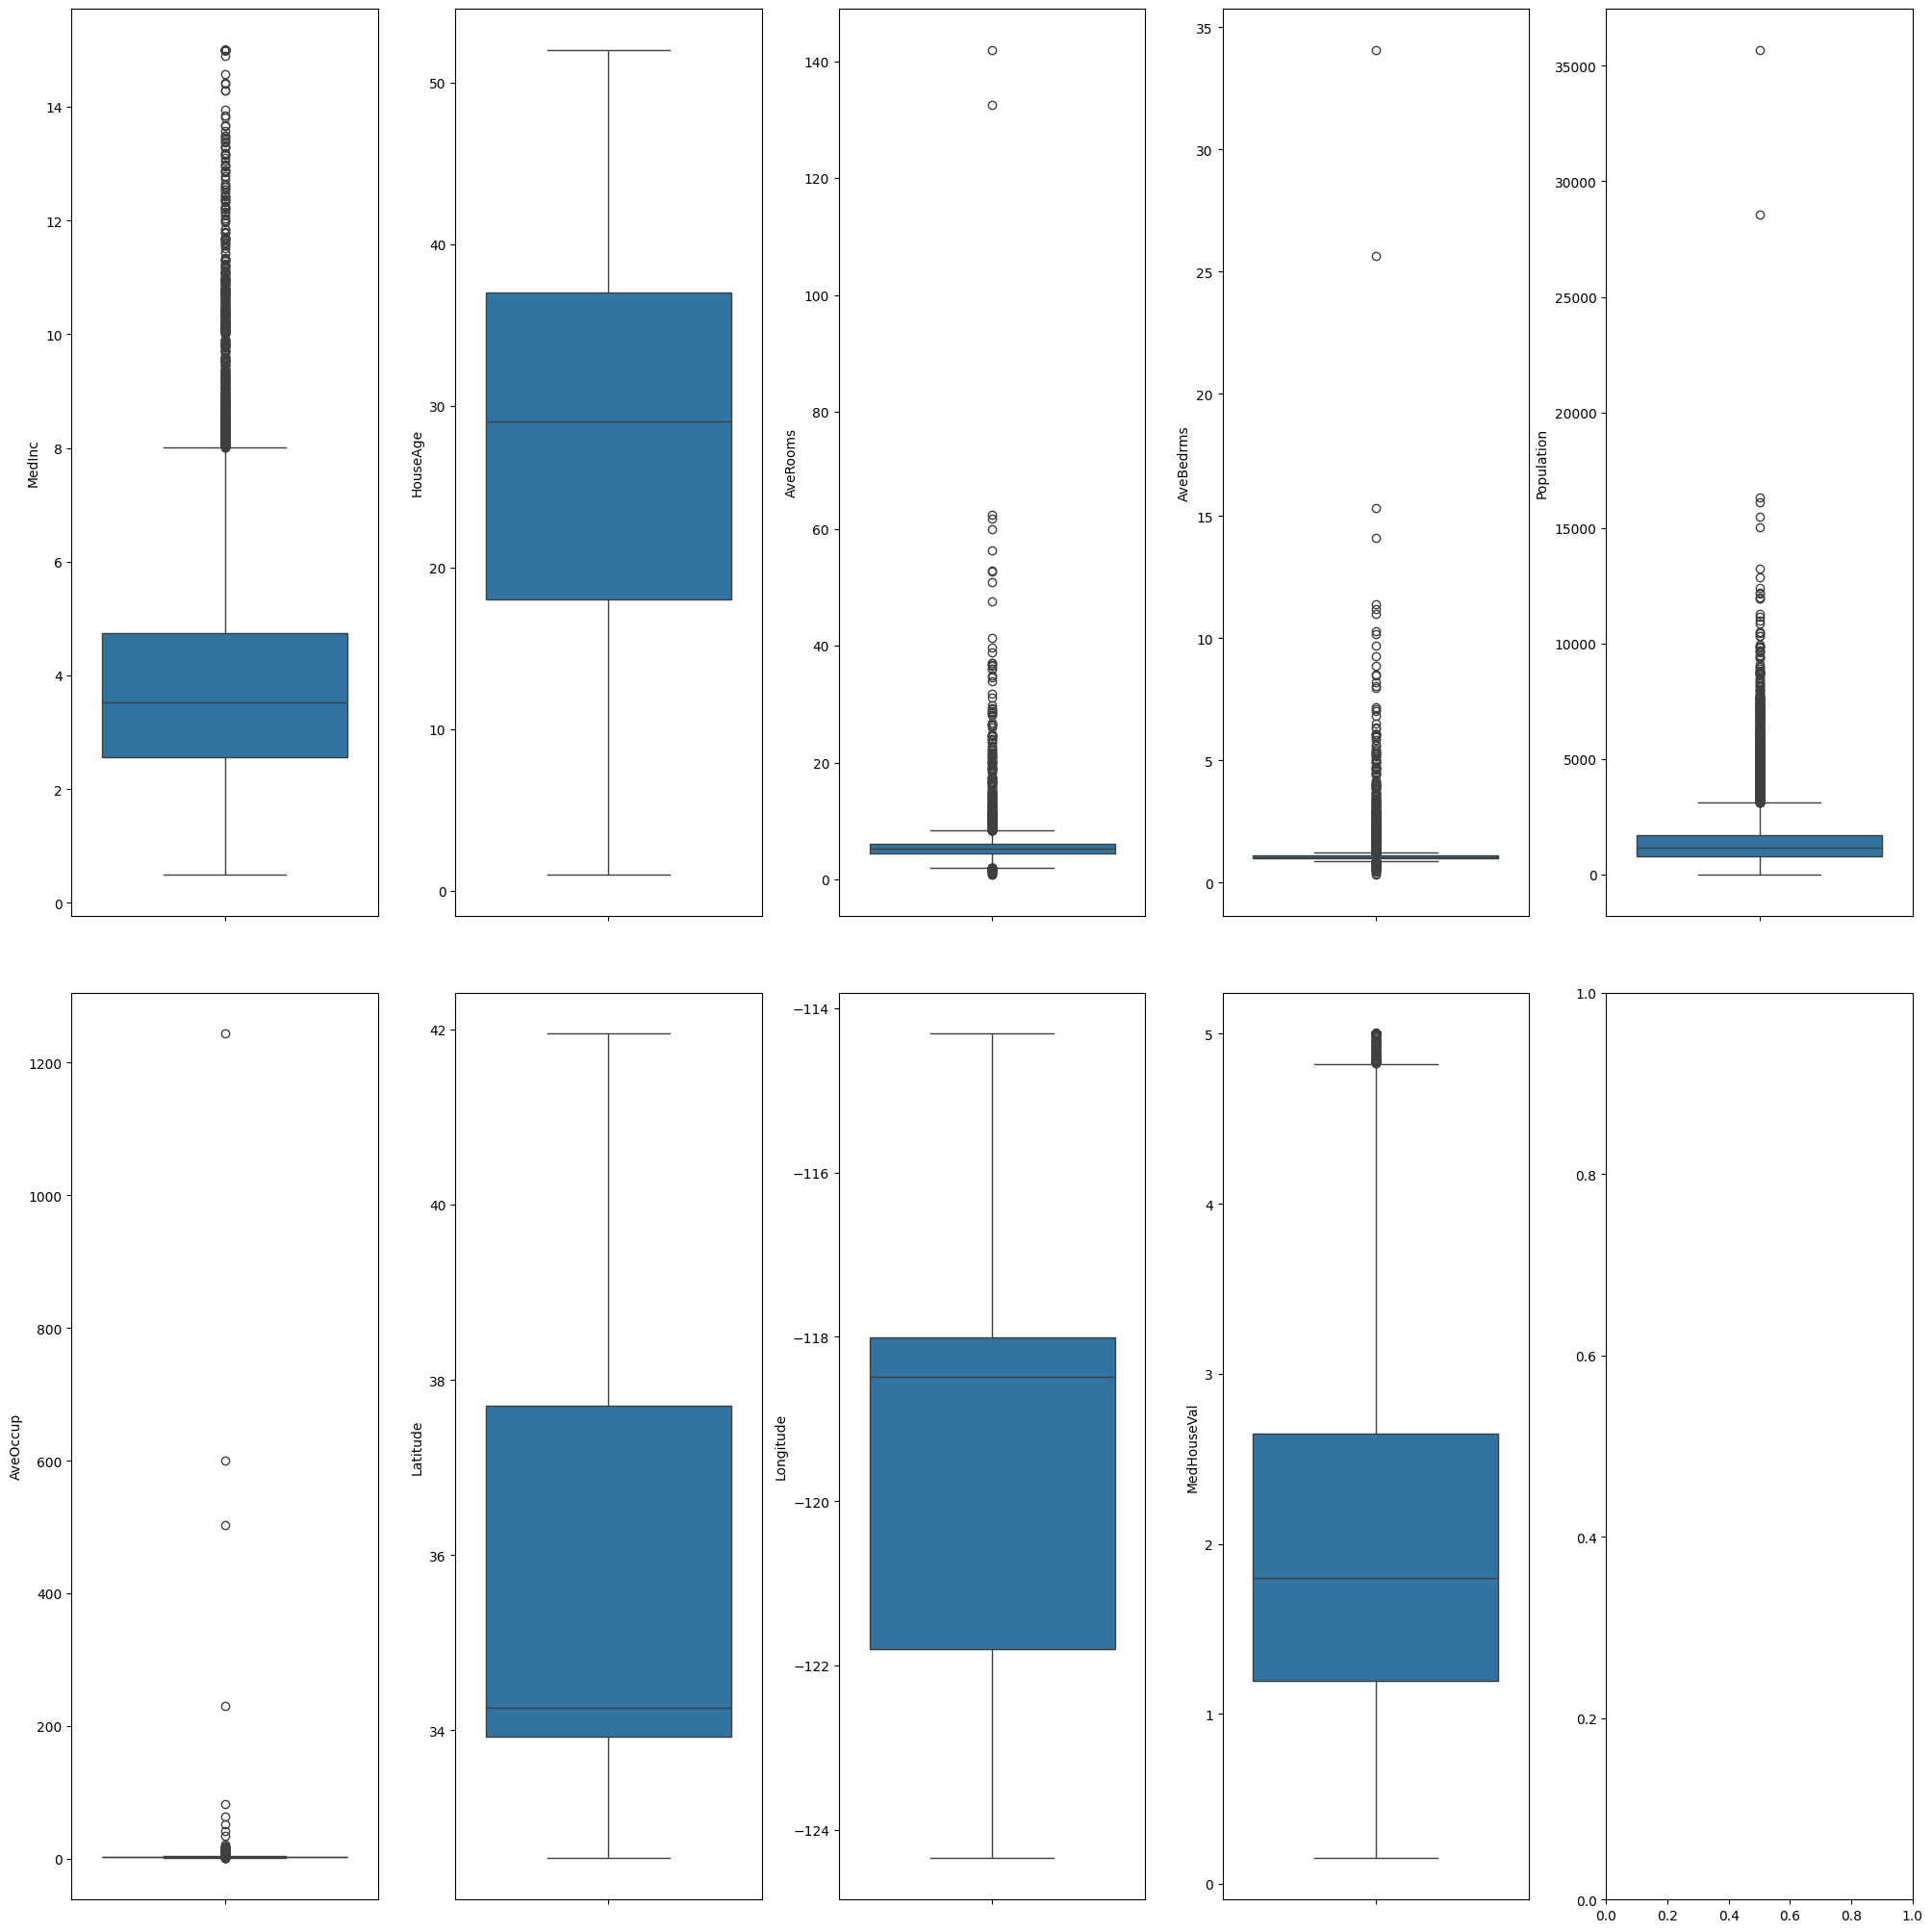

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [42]:
import numpy as np

for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))


Column MedInc outliers = 3.30%
Column HouseAge outliers = 0.00%
Column AveRooms outliers = 2.48%
Column AveBedrms outliers = 6.90%
Column Population outliers = 5.80%
Column AveOccup outliers = 3.44%
Column Latitude outliers = 0.00%
Column Longitude outliers = 0.00%
Column MedHouseVal outliers = 5.19%


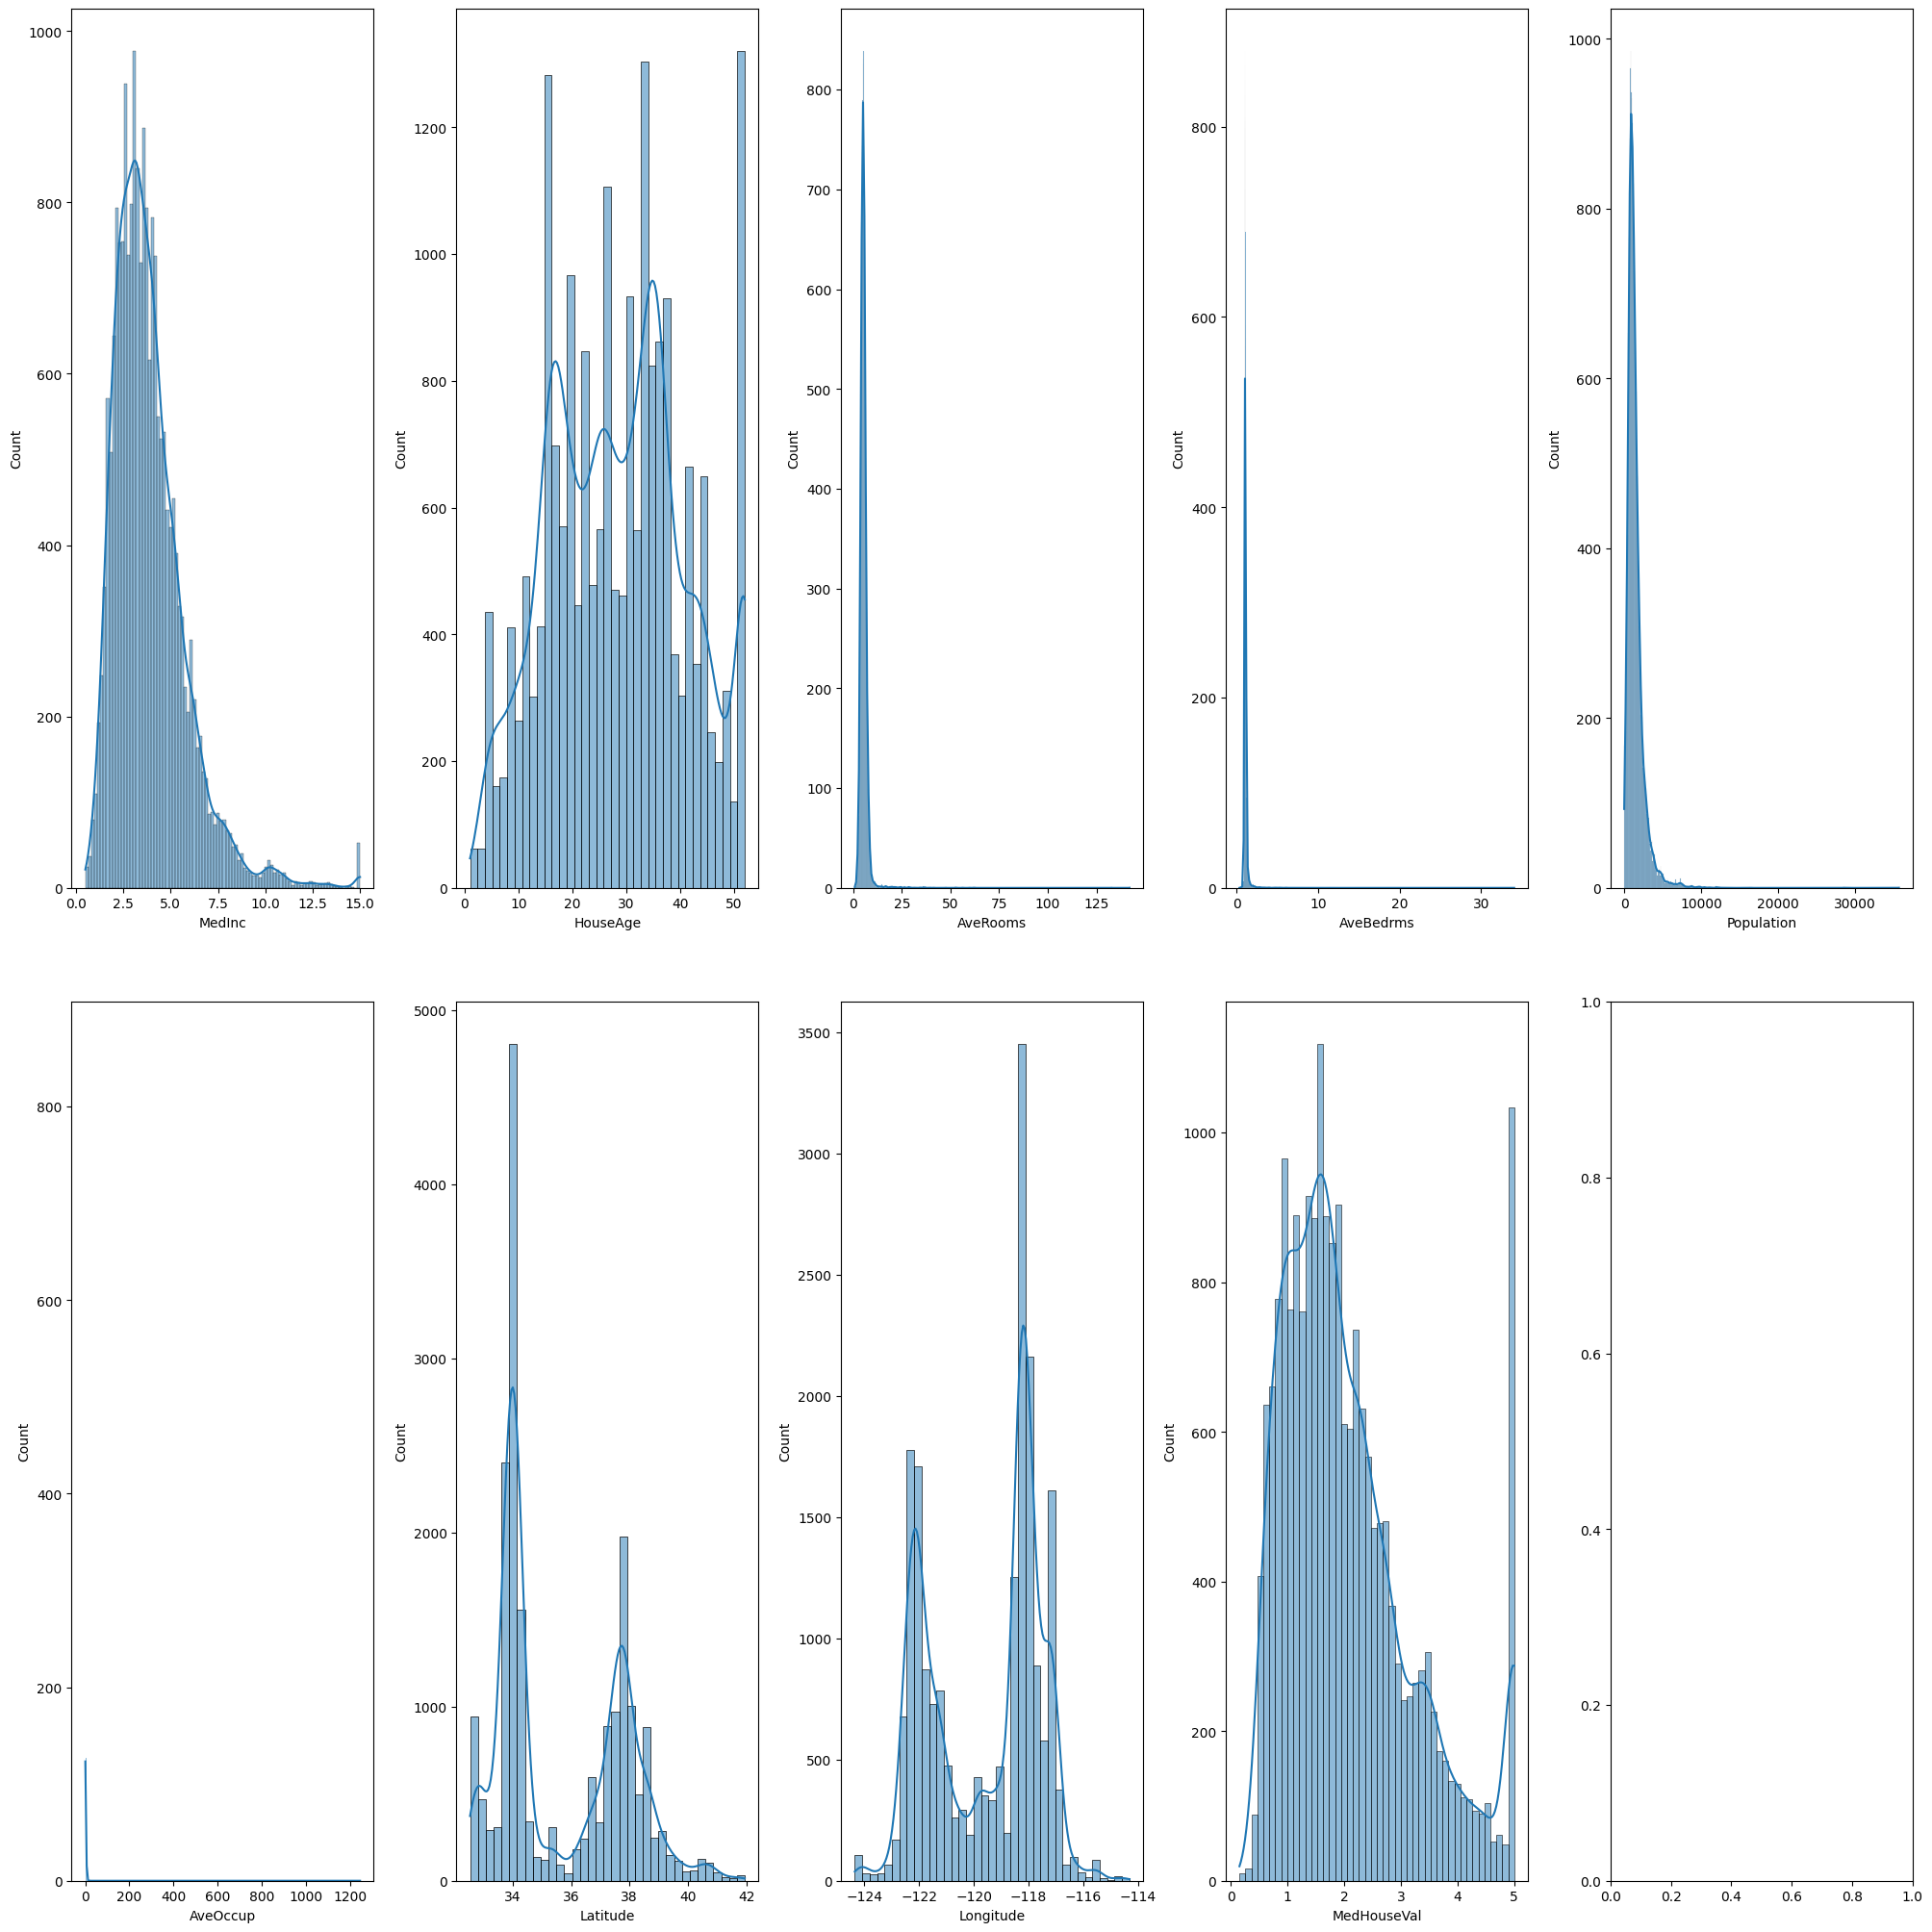

In [44]:
#import warnings
#warnings.filterwarnings('ignore')

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(v, kde=True, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Correlation Heatmap


### Why Correlation and Multicollinearity Matter

**Correlation** measures the strength and direction of linear relationships between features and the target variable. Features with strong positive or negative correlations are often more predictive, as they carry meaningful information about the outcome. Identifying these relationships helps prioritize important features for analysis or modeling.

**Multicollinearity** occurs when two or more features are highly correlated with each other, leading to redundant information in the dataset. This redundancy can create several challenges:

- **Interpretability Issues:** In models like Linear Regression, coefficients can become difficult to interpret, as changes in one feature may be tied to changes in another.
- **Instability:** Small changes in the data can cause large swings in coefficient estimates, reducing the model’s reliability.
- **Overfitting:** Multicollinearity increases the risk of overfitting, as the model might focus on noise rather than meaningful patterns, inflating variance in predictions.

Identifying and addressing multicollinearity ensures models are more stable, interpretable, and generalizable.


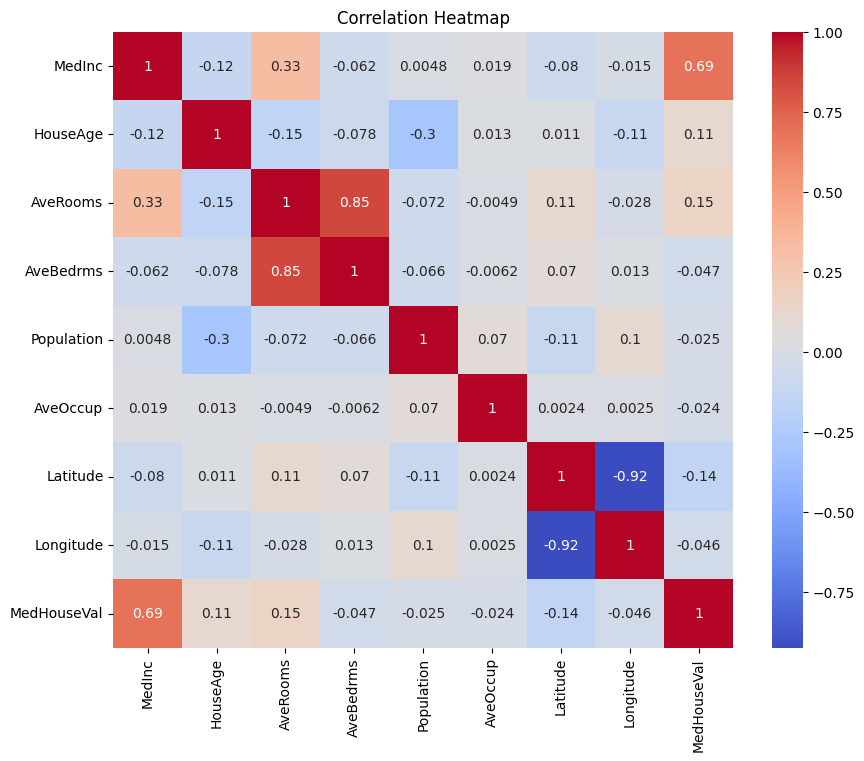

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Splitting Data


### Why Do We Split Data?

Splitting data into training and testing sets is essential for building and evaluating machine learning models. Here's why:

- **Train Set:** This subset of the data is used to teach the model the relationships and patterns within the dataset. The model learns how to predict the target variable based on the features in this set.

- **Test Set:** This subset is kept completely separate and is used to evaluate the model's performance on unseen data. Testing on new, unseen data simulates real-world scenarios, where the model encounters inputs it has never seen before.

- **Avoid Data Leakage:** Training and testing on the same data would overestimate model performance, as the model would essentially be "tested" on information it already knows. This leads to misleading results and a lack of generalizability.

- **Generalization Ability:** Splitting data ensures the model is evaluated on its ability to generalize to unseen data, not just memorize patterns from the training set. A model that performs well on unseen test data is more likely to succeed when deployed in the real world.

By maintaining a clear separation between training and testing data, we create a reliable framework to assess how well the model is likely to perform on future, real-world inputs.


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop("MedHouseVal", axis=1)  # Features
y = df["MedHouseVal"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression and Model Evaluation


### Linear Regression

Linear Regression is a simple and widely used algorithm for modeling the relationship between a dependent variable (target) and one or more independent variables (features). It assumes a linear relationship between the target and features. Linear Regression is intuitive and interpretable, making it a strong baseline model. It performs well when the relationship between the features and the target is approximately linear and there is little multicollinearity among features.


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.5558915986952443
R² Score: 0.5757877060324508


### Model Evaluation

Model evaluation metrics assess how well a model performs on unseen test data. Each metric captures different aspects of performance:

- **Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual values. It penalizes larger errors more heavily, making it useful for identifying models that struggle with extreme deviations.

- **Root Mean Squared Error (RMSE):** The square root of MSE, expressed in the same units as the target variable. RMSE provides a more interpretable measure of error magnitude.

- **R^2 Score:** Represents the proportion of variance in the target variable that is explained by the model. A higher \( R^2 \) score indicates a better fit, but it does not imply causation or suitability for all use cases.

Choosing appropriate evaluation metrics depends on the problem context. For instance, MSE and RMSE are more sensitive to outliers, while \( R^2 \) is better suited for understanding overall model fit.


### Why Choosing the Right Metric Matters

Selecting the right evaluation metric is critical because it must align with the specific use case and data characteristics. Different metrics highlight different aspects of model performance, and the wrong choice can lead to misleading conclusions.

For example, when working with **spatial data** (such as property prices), unique challenges like **spatial autocorrelation** may arise. Spatial autocorrelation occurs when nearby properties have similar values due to geographic or neighborhood effects. In such cases:

- **A low MSE** might suggest good performance but could mask poor generalization if errors are clustered spatially.
- **Spatial metrics** like **Moran’s I** (a measure of spatial autocorrelation) can complement traditional metrics to better evaluate how well the model captures spatial patterns.

By understanding the context of the data, we can choose metrics that accurately reflect model quality and ensure robust evaluation in real-world scenarios.


In [13]:
# value of y-intercept
lr.intercept_

-37.023277706064185

In [14]:
#Converting the coefficient values to a dataframe
coeffs = pd.DataFrame([X_train.columns,lr.coef_]).T
coeffs = coeffs.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffs

,Attribute,Coefficients
0,MedInc,0.448675
1,HouseAge,0.009724
2,AveRooms,-0.123323
3,AveBedrms,0.783145
4,Population,-0.000002
5,AveOccup,-0.003526
6,Latitude,-0.419792
7,Longitude,-0.433708


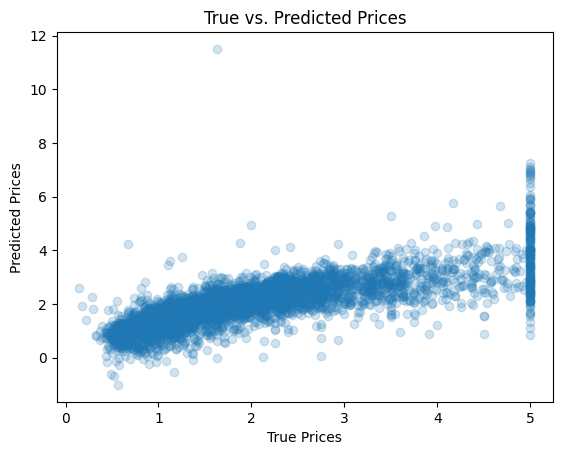

In [15]:
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True vs. Predicted Prices")
plt.show()

In this case, we notice that our residuals are not randomly distributed around 0, but rather suggest a slight upward trend. This indicates that there may be non-linear relationship terms in the model that a linear regression doesn't account for. Therefore, a model other than a linear regression (e.g, a random forest) might be more effective.


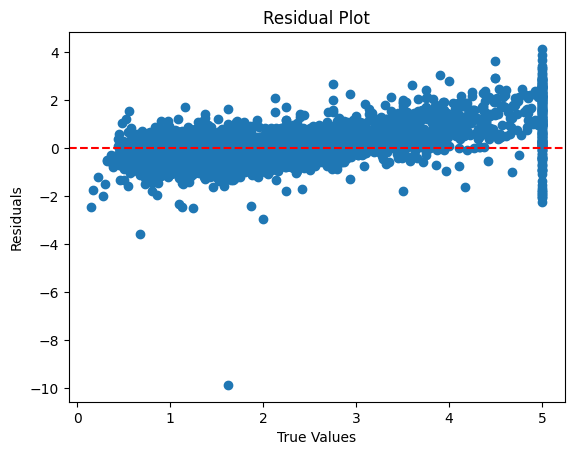

In [16]:
import matplotlib.pyplot as plt

# Residual plot
plt.scatter(y_test, y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

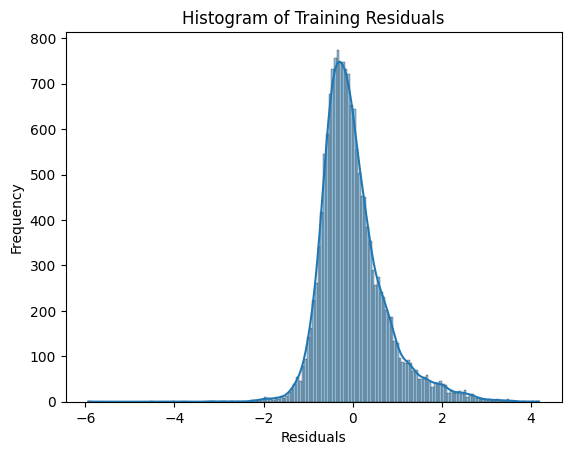

In [17]:
train_pred = lr.predict(X_train)

# Residuals for the training set
train_residuals = y_train - train_pred

# Plot the histogram of residuals
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_residuals, kde=True)
plt.title("Histogram of Training Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### Cross-Validation

Cross-validation is a technique used to evaluate a model’s performance by splitting the dataset into multiple subsets (folds) and testing the model on different portions of the data. This process ensures that the evaluation is not dependent on a single train-test split and provides a more robust estimate of model performance.

#### How It Works:

1. The data is divided into \( k \) folds.
2. The model is trained on \( k-1 \) folds and tested on the remaining fold.
3. This process is repeated \( k \) times, with each fold used as the test set exactly once.
4. The performance metrics (e.g., MSE, \( R^2 \)) are averaged across all folds to give an overall assessment.

#### Why It Matters:

- **Reduces Overfitting Risk:** Ensures the model generalizes well across different subsets of the data.
- **Provides Reliable Metrics:** Evaluates the model on multiple splits, minimizing the bias from any single train-test split.
- **Works for Small Datasets:** Maximizes the use of limited data by using all data points for both training and testing across different iterations.

#### Example Use Case:

For the California housing dataset, \( k \)-fold cross-validation can help ensure that the evaluation accounts for the natural variability in the data, particularly when geographic or demographic effects might influence the results.

Cross-validation is an essential step to build models that are not only accurate but also reliable in real-world applications.


In [18]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validated MSE: {-cv_scores.mean()}')

Cross-Validated MSE: 0.5582901717686545


### Regularization (Ridge and Lasso Regressions)


Ridge Regression: Adds a penalty for large coefficients to prevent overfitting.
Lasso Regression: Encourages sparsity by shrinking less important features to zero.


In [19]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

print(f'Ridge MSE: {mean_squared_error(y_test, ridge.predict(X_test))}')
print(f'Lasso MSE: {mean_squared_error(y_test, lasso.predict(X_test))}')

Ridge MSE: 0.5558034669932209
Lasso MSE: 0.6135115198058131


In [20]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Support Vector Machine
svm = SVR(kernel='rbf', C=100, gamma=0.1)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_pred)
print(f"SVM MSE: {svm_mse}")

SVM MSE: 1.101011335402103


### Decision Tree Model


In [24]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=7)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(f'Decision Tree MSE: {mean_squared_error(y_test, dt_pred)}')

Decision Tree MSE: 0.45658571039291657


### Random Forest Model


In [23]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest MSE: {rf_mse}")

Random Forest MSE: 0.29649278336294826


### Artificial Neural Network (ANN)


In [25]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Create and train the MLP Regressor (ANN)
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),  # Two hidden layers with 64 and 32 neurons
    activation='relu',           # Activation function for the hidden layers
    solver='adam',               # Optimization algorithm
    max_iter=500,                # Maximum number of iterations
    random_state=42
)

mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

# Evaluate the model
mlp_mse = mean_squared_error(y_test, mlp_pred)
print(f"ANN MSE: {mlp_mse}")

ANN MSE: 0.6473135670830514


### Model Comparison


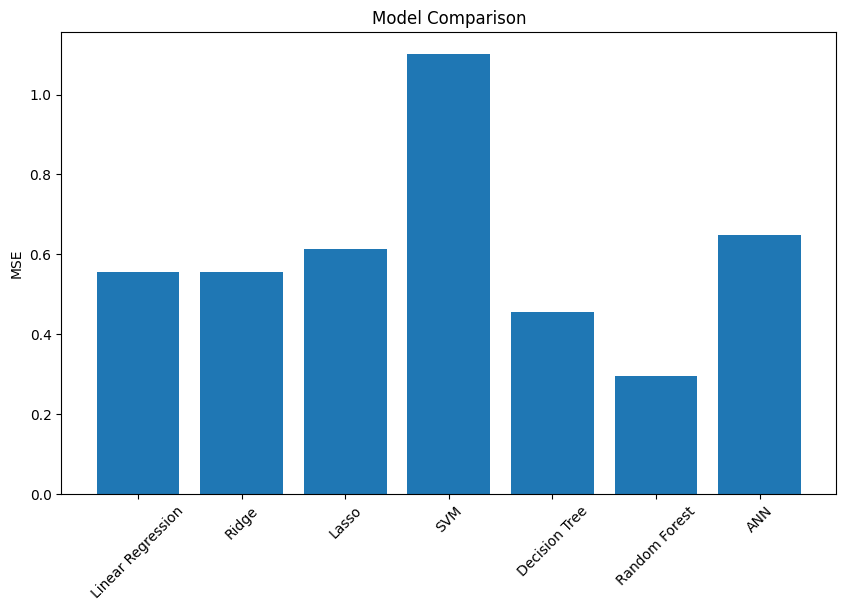

In [45]:
# Add models to the list
models = ['Linear Regression', 'Ridge', 'Lasso', 'SVM', 'Decision Tree', 'Random Forest', 'ANN']

# Calculate MSE values for all models
mse_values = [
    mse,  # Linear Regression
    mean_squared_error(y_test, ridge.predict(X_test)),  # Ridge
    mean_squared_error(y_test, lasso.predict(X_test)),  # Lasso
    svm_mse,   # SVM
    mean_squared_error(y_test, dt_pred),  # Decision Tree
    rf_mse,  # Random Forest
    mlp_mse #ANN
]

# Plot model comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values)
plt.ylabel('MSE')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.show()